In [ ]:
import pandas as pd
# Reload for a clean session
merged_df = pd.read_csv('../temp/pisa_ses_tracking_merged.csv')
print(merged_df.head())

  Country Subject       SES       Coef        SE  CNT Country_Name  \
0     ESP    MATH      ESCS  32.325643  0.553436  ESP        Spain   
1     ESP    MATH  PAREDINT   6.718253  0.189549  ESP        Spain   
2     ESP    MATH     HISEI   1.092689  0.022805  ESP        Spain   
3     ESP    READ      ESCS  30.542562  0.864474  ESP        Spain   
4     ESP    READ  PAREDINT   6.694703  0.304785  ESP        Spain   

  tracking_age  
0           16  
1           16  
2           16  
3           16  
4           16  


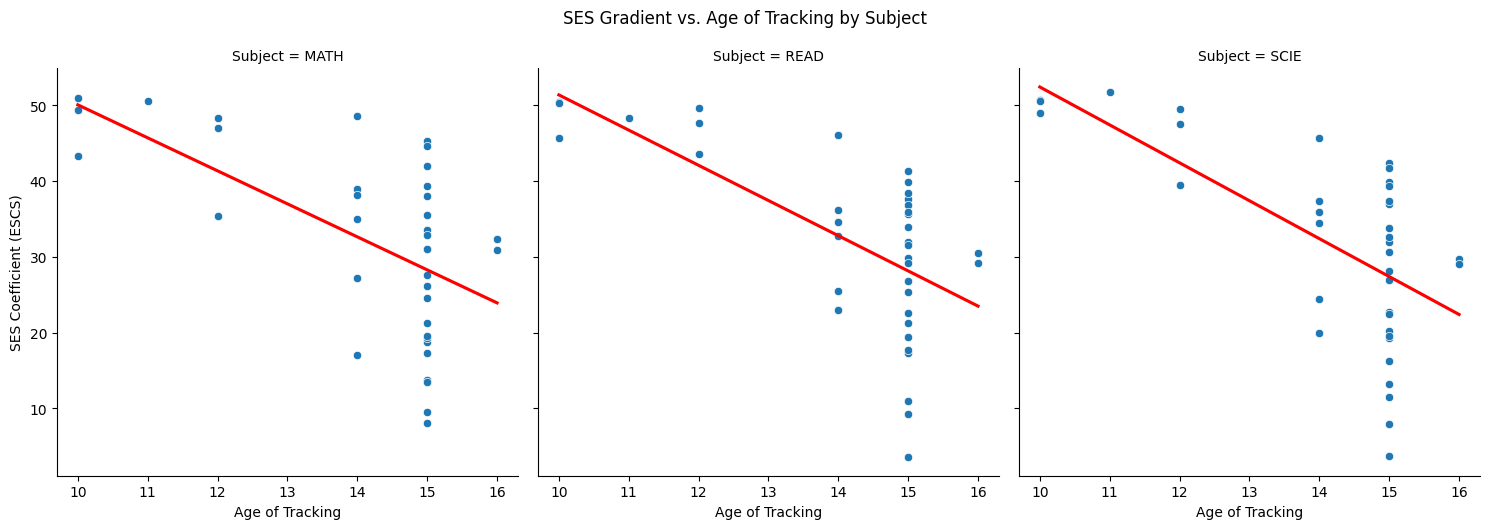

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter ESCS only
escs_df = merged_df[merged_df['SES'] == 'ESCS'].copy()
escs_df['tracking_age_num'] = pd.to_numeric(escs_df['tracking_age'], errors='coerce')

# Facet scatterplot by subject
g = sns.FacetGrid(escs_df, col="Subject", height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x="tracking_age_num", y="Coef")
g.map_dataframe(sns.regplot, x="tracking_age_num", y="Coef", scatter=False, ci=None, line_kws={"color":"red"})
g.set_axis_labels("Age of Tracking", "SES Coefficient (ESCS)")
g.fig.suptitle("SES Gradient vs. Age of Tracking by Subject", y=1.05)
plt.show()

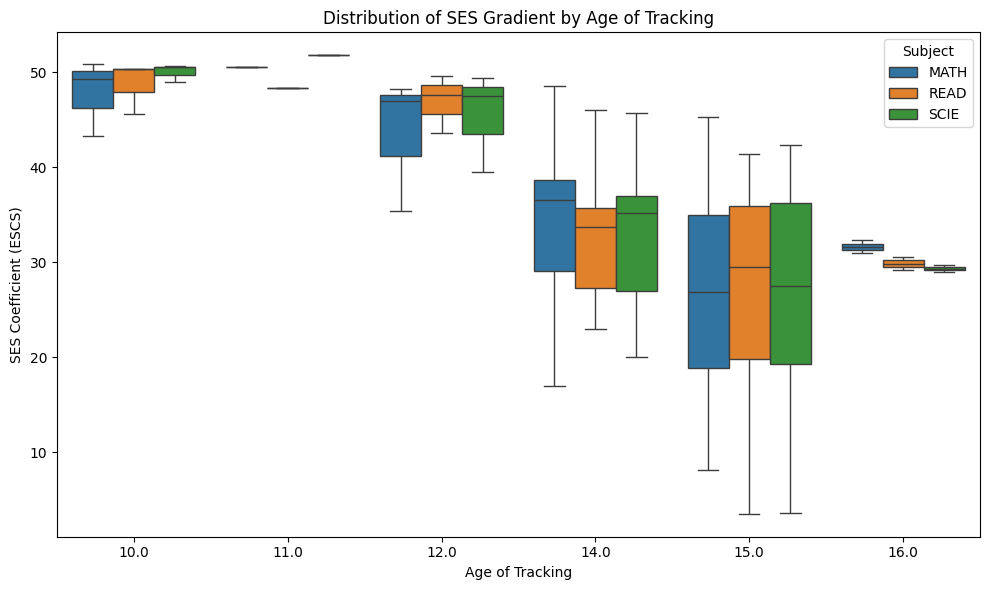

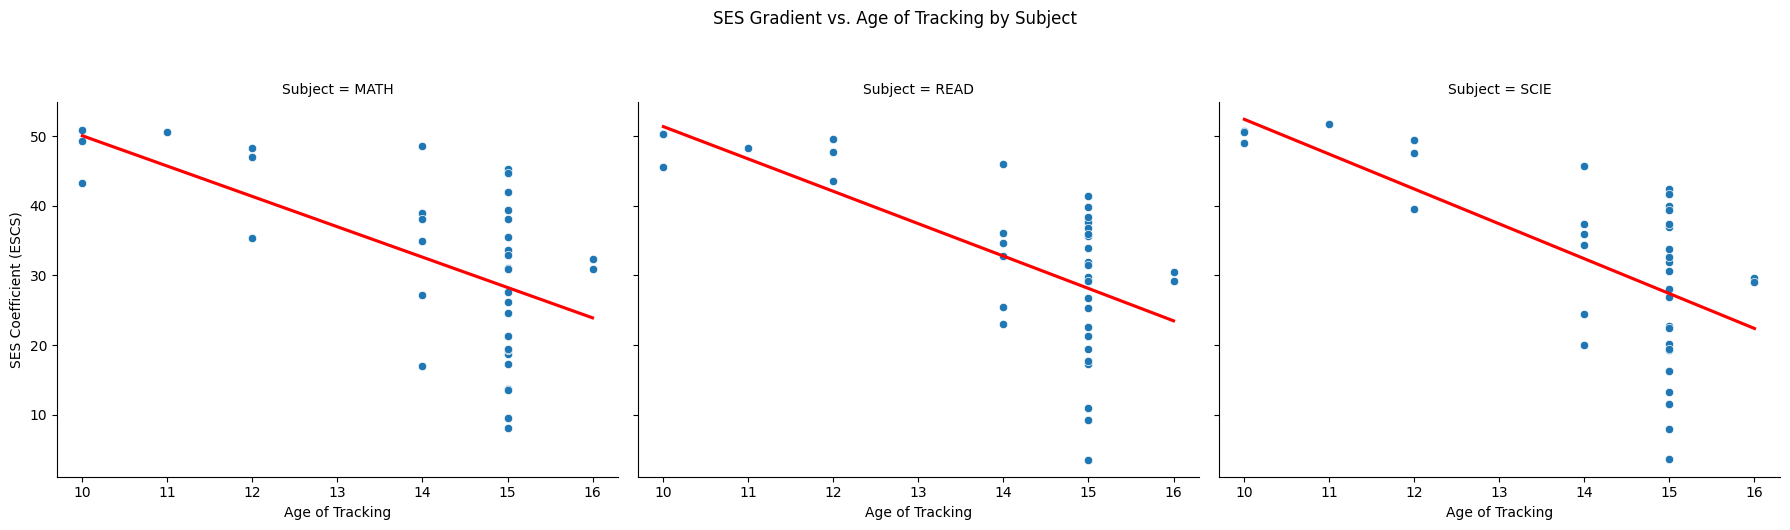

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load merged file
df = pd.read_csv('../temp/pisa_ses_tracking_merged.csv')

# Filter to ESCS only
escs_df = df[df['SES'] == 'ESCS'].copy()
escs_df['tracking_age_num'] = pd.to_numeric(escs_df['tracking_age'], errors='coerce')

# --- Figure 1: Boxplot by tracking age ---
plt.figure(figsize=(10,6))
sns.boxplot(
    data=escs_df,
    x='tracking_age_num',
    y='Coef',
    hue='Subject'
)
plt.xlabel("Age of Tracking")
plt.ylabel("SES Coefficient (ESCS)")
plt.title("Distribution of SES Gradient by Age of Tracking")
plt.legend(title='Subject')
plt.tight_layout()
plt.show()

# --- Figure 2: Scatter + regression lines (faceted by subject) ---
g = sns.FacetGrid(escs_df, col="Subject", height=5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="tracking_age_num", y="Coef")
g.map_dataframe(sns.regplot, x="tracking_age_num", y="Coef", scatter=False, ci=None, line_kws={"color":"red"})
g.set_axis_labels("Age of Tracking", "SES Coefficient (ESCS)")
g.fig.suptitle("SES Gradient vs. Age of Tracking by Subject", y=1.05)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

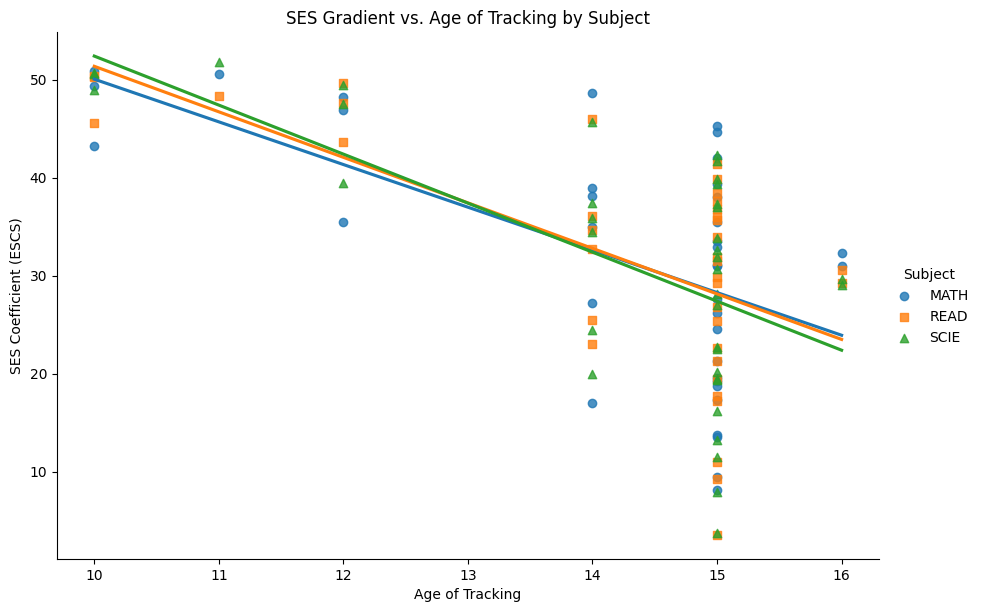

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter + regression lines, one color per subject
plt.figure(figsize=(10,6))
sns.lmplot(
    data=escs_df,
    x='tracking_age_num',
    y='Coef',
    hue='Subject',
    markers=['o','s','^'],
    height=6,
    aspect=1.5,
    ci=None
)
plt.xlabel("Age of Tracking")
plt.ylabel("SES Coefficient (ESCS)")
plt.title("SES Gradient vs. Age of Tracking by Subject")
plt.show()